# Week 11 - Bayesian Linear Regression

[[0.94419616 0.12754642]
 [0.12754642 1.90910996]]


/home/arek/miniconda3/envs/math4ml/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'aspect'
  cset = contour_func(


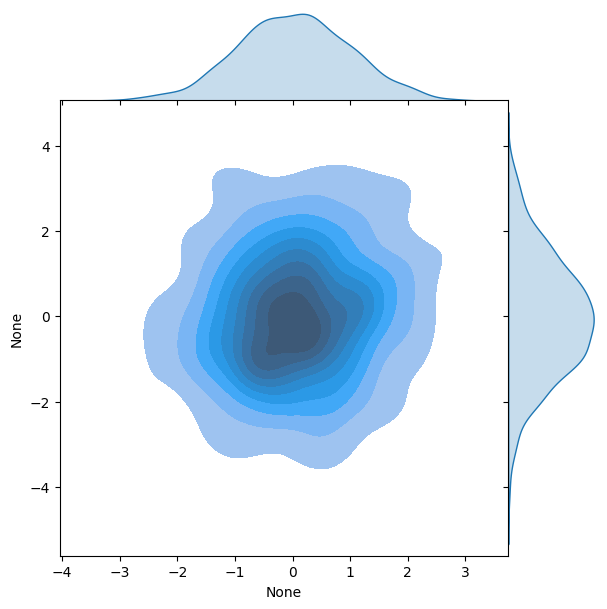

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set_theme()

if __name__ == "__main__":
    m = np.array([[0,0]]).T
    cov = np.array([[1,0.5],[0.2,2]])

    #solution

    observations = []
    for i in range(1000):
        x = np.random.normal(size=(2,1))
        L = np.linalg.cholesky(cov)
        u = m + L@x
        observations.append(u)

    observations = np.concatenate(observations, axis=1)
    # Check the covariance matrix
    print(np.cov(observations))
    sns.jointplot(x=observations[0,:], y = observations[1,:], kind="kde", space=0, fill=True, aspect=1)
    plt.show()



        

# Bayesian Linear Regression

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


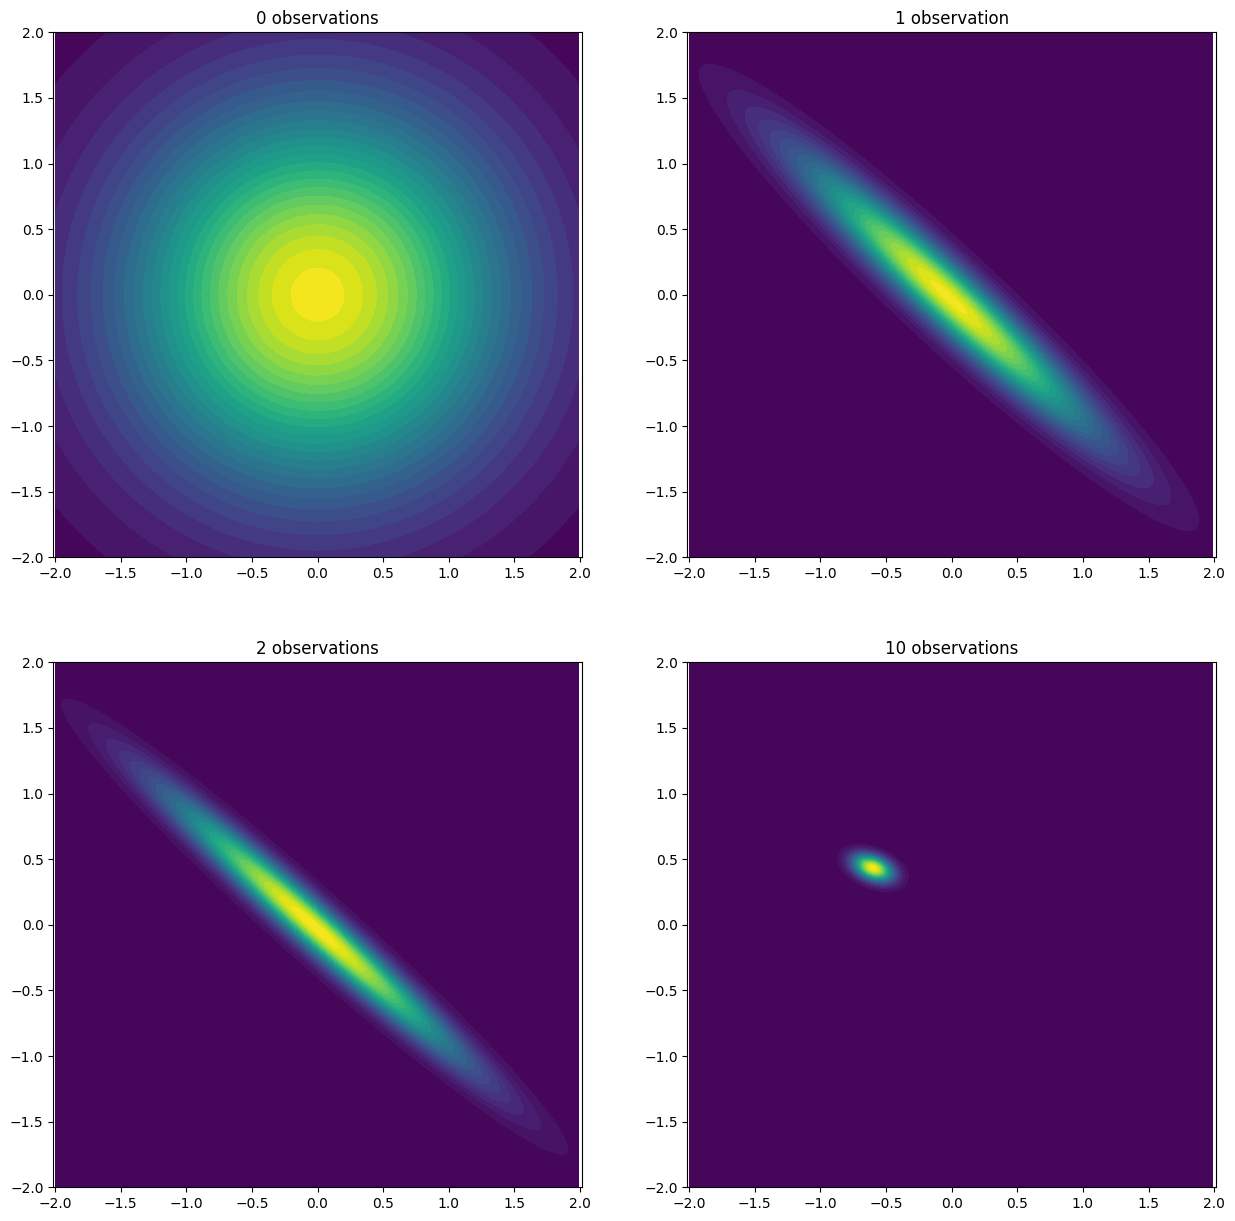

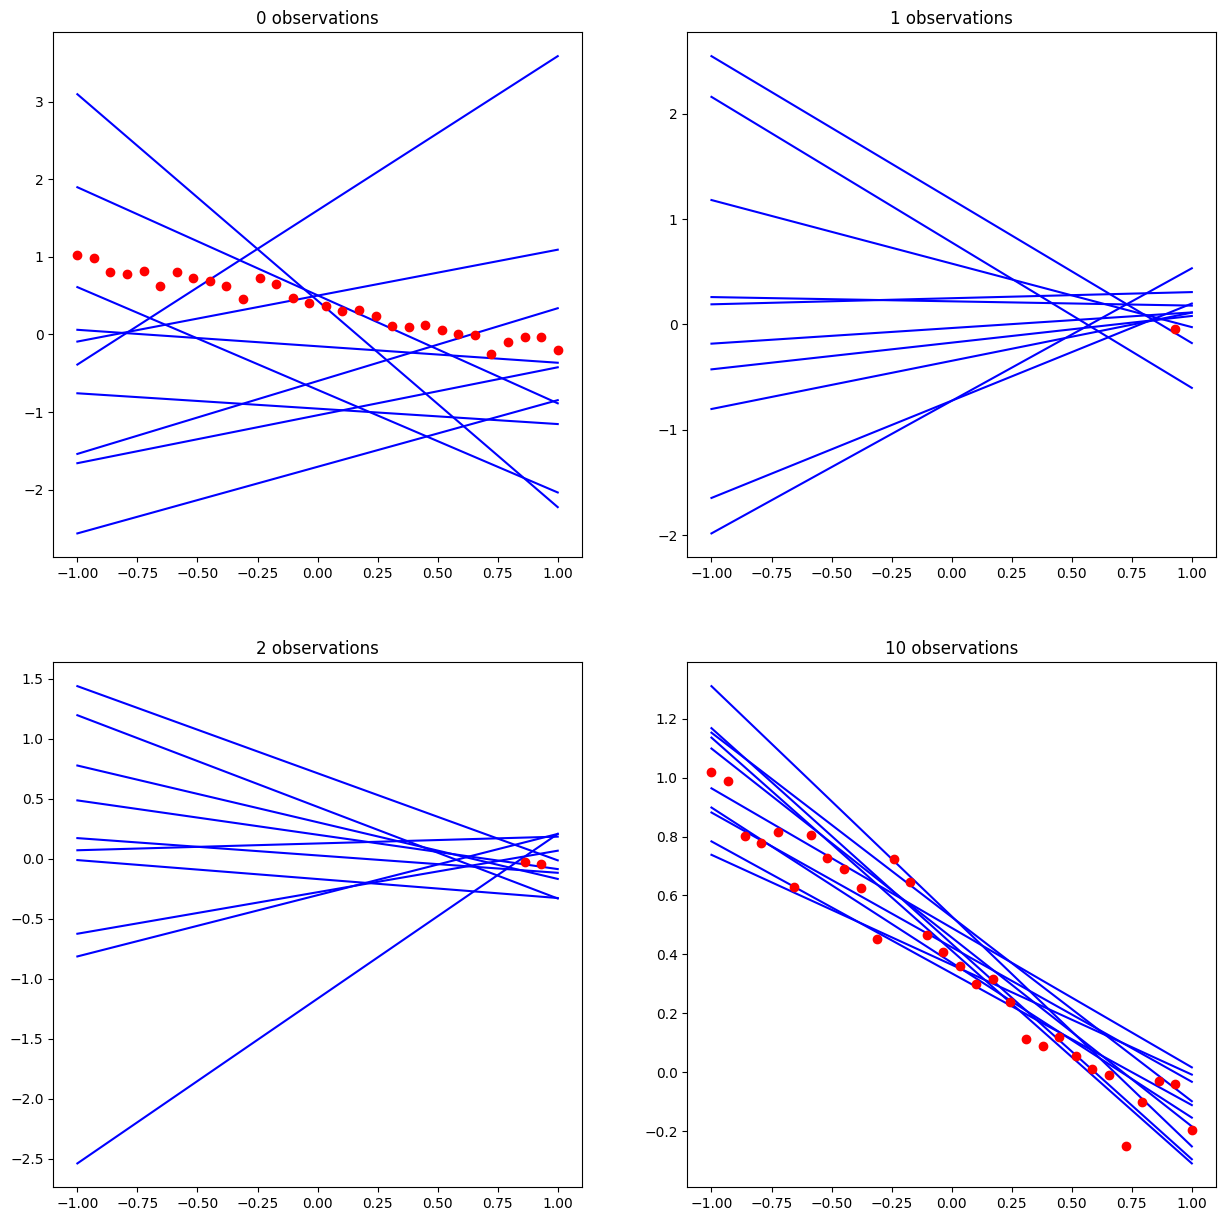

(array([[-0.76458854]]), array([[0.34923216]]))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import multivariate_normal

alpha = 1 
beta = 25


def generate_dataset(w):
    x = np.linspace(-1,1, 30)
    y = w[0]*x + w[1] + 0.1 * np.random.normal(size=x.shape)

    x = x[:,None]
    y = y[:,None]

    X = np.hstack((x, np.ones_like(x)))
    return X, y

def plot_distribution(m, S):
    x, y = np.mgrid[-2:2:.01, -2:2:.01]
    pos = np.dstack((x, y))
    rv = multivariate_normal(m.squeeze(), S)
    plt.contourf(x, y, rv.pdf(pos), levels=30, cmap='viridis')
    plt.axis('equal')
    plt.xlim((-2,2))
    plt.ylim((-2,2))
    

def calculate_posterior_parameters(X, y):
    Sn_inv = alpha*np.eye(2) + beta*X.T@X
    Sn = np.linalg.inv(Sn_inv)
    mn = beta*Sn@X.T@y
    return mn, Sn


def plot_functions(mn, Sn, points = False):

    x = np.linspace(-1,1,30)
    for i in range(10):
        w = np.random.multivariate_normal(mn.squeeze(), Sn)
        y = w[0]*x + w[1]
        plt.plot(x,y, c='b', zorder=1)

    if points:
        X,y = points 
        plt.scatter(X[:,0], y, c ='r', zorder=2)

def calculate_predictive_distribution(x, mn, Sn):
    mean = mn.T@np.array([[2,1]]).T
    var = (1/beta) + x.T@Sn@x
    std = np.sqrt(var)
    return mean, std



w = np.array([[-0.6, 0.4]]).T
X, y = generate_dataset(w)
indexes = list(range(30))
random.shuffle(indexes)


plt.figure(figsize=(15,15))

# plot the prior
plt.subplot(221)
plot_distribution(np.array([0,0]), np.array([[1,0], [0,1]])) 
plt.title('0 observations')

# plot posteriors
nb_of_points = 1
X_new = X[ indexes[:nb_of_points],:]
y_new = y[indexes[:nb_of_points],:]
# calculate posterior distribution
mn, Sn = calculate_posterior_parameters(X_new,y_new)
plt.subplot(222)
plot_distribution(mn, Sn) 
plt.title('1 observation')

nb_of_points = 2
X_new = X[ indexes[:nb_of_points],:]
y_new = y[indexes[:nb_of_points],:]
# calculate posterior distribution
mn, Sn = calculate_posterior_parameters(X_new,y_new)
plt.subplot(223)
plot_distribution(mn, Sn) 
plt.title('2 observations')

nb_of_points = 10
X_new = X[ indexes[:nb_of_points],:]
y_new = y[indexes[:nb_of_points],:]
# calculate posterior distribution
mn, Sn = calculate_posterior_parameters(X_new,y_new)
plt.subplot(224)
plot_distribution(mn, Sn) 
plt.title('10 observations')


# functions
plt.figure(figsize=(15,15))
plt.subplot(221)
plot_functions(np.array([0,0]), np.array([[1,0],[0,1]]), points=(X,y)) 
plt.title('0 observations')


nb_of_points = 1
X_new = X[ indexes[:nb_of_points],:]
y_new = y[indexes[:nb_of_points],:]
# calculate posterior distribution
mn, Sn = calculate_posterior_parameters(X_new,y_new)
plt.subplot(222)
plot_functions(mn, Sn, points=(X_new,y_new)) 
plt.title(f'{nb_of_points} observations')





nb_of_points = 2
X_new = X[ indexes[:nb_of_points],:]
y_new = y[indexes[:nb_of_points],:]
# calculate posterior distribution
mn, Sn = calculate_posterior_parameters(X_new,y_new)
plt.subplot(223)
plot_functions(mn, Sn, points=(X_new,y_new)) 
plt.title(f'{nb_of_points} observations')


nb_of_points = 10
X_new = X[ indexes[:nb_of_points],:]
y_new = y[indexes[:nb_of_points],:]
# calculate posterior distribution
mn, Sn = calculate_posterior_parameters(X_new,y_new)
plt.subplot(224)
plot_functions(mn, Sn, points=(X,y)) 
plt.title(f'{nb_of_points} observations')

plt.show()


# calculate predictive distribution
x = np.array([[3,1]]).T
print(calculate_predictive_distribution(x, mn, Sn))